In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import linalg as la
sp.init_printing() 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns


## File Manipulation and Data Visualization

Most datasets are in .cvs files. There are many sourses of data sets out there (Google, Kaggle, Nasa, Amazon, Wikipedia, etc). For the first example, I will use a dataset from Kaggle: "Palmer Archipelago (Antarctica) penguin data". It is already partially cleaned. 

First make sure the .cvs file is in the same folder as this file.

Now, we will import the data using Pandas library:

In [2]:
df=pd.read_csv('penguins_size.csv')
df.shape     ## size of the data. In this case its 341 rows and 7 columns

Let's look how our data looks like:

In [3]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
336,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
337,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
338,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
339,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


So, we can see that we have 341 penguins and for each we have:
1. species
2. island - on which island of archipelago it was observed
3. culmen_length_mm and culmen_depth_mm - this is size of the upper ridge of a beak in millimeters.
4. flipper_length_mm  - length of flipper in millimeters
5. body_mass_g - measured in grams
6. sex

It is also worth noting that the df is saved as dataframe. It is a type of data structure commonly used in data science. Dataframe is not the same as array or matrix. 

Let's now check the type of each column of df:

In [4]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm      int64
body_mass_g            int64
sex                   object
dtype: object

Here we can see we have three types:

1. object - generally its just text
2. int64 - integers
3. float64 - numbers with decimal point (basically real)

Few more commands:

In [5]:
## statistical information on columns with numerical data. Lets also take transpose so that we can read horizontally
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,341.0,43.920235,5.467516,32.1,39.2,44.4,48.5,59.6
culmen_depth_mm,341.0,17.155425,1.976124,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,341.0,200.868035,14.055255,172.0,190.0,197.0,213.0,231.0
body_mass_g,341.0,4199.780059,802.300201,2700.0,3550.0,4050.0,4750.0,6300.0


In [6]:
df['species'].value_counts()   ## counts how many of each species we have.

species
Adelie       151
Gentoo       122
Chinstrap     68
Name: count, dtype: int64

In [7]:
df['sex'].value_counts()  ## shows how many male and female penguines we have

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

This last result is a bit strange 168+165=333, but we have 341 penguines. This means we are missing some information. Let's find it and clean (in this case delete) these rows. Usually, such entry contain NA or NAN values. We can remove them using dropna command. But before that, we need to locate them. There are two methods that are very useful for locating things in the data frame: `.loc` and `.iloc`. The `.loc` gets row ar column with particular label, while `.iloc` gets row or columns at integer locations:

In [8]:
# suppose we want to extract all rows that belong to Biscoe island:
df.loc[df.island=='Biscoe']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
19,Adelie,Biscoe,37.8,18.3,174,3400,FEMALE
20,Adelie,Biscoe,37.7,18.7,180,3600,MALE
21,Adelie,Biscoe,35.9,19.2,189,3800,FEMALE
22,Adelie,Biscoe,38.2,18.1,185,3950,MALE
23,Adelie,Biscoe,38.8,17.2,180,3800,MALE
...,...,...,...,...,...,...,...
336,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
337,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
338,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
339,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


In [9]:
# suppose we want to select the first and the third columns and only the first 10 rows:
df.iloc[:10,[0,2]]

,species,culmen_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,36.7
4,Adelie,39.3
5,Adelie,38.9
6,Adelie,39.2
7,Adelie,34.1
8,Adelie,42.0
9,Adelie,37.8


Now let's locate all missing values using `.loc` and `.isna()`:

In [10]:
df.loc[df.sex.isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193,3475,NaN
8,Adelie,Torgersen,42.0,20.2,190,4250,NaN
9,Adelie,Torgersen,37.8,17.1,186,3300,NaN
10,Adelie,Torgersen,37.8,17.3,180,3700,NaN
46,Adelie,Dream,37.5,18.9,179,2975,NaN
245,Gentoo,Biscoe,44.5,14.3,216,4100,NaN
285,Gentoo,Biscoe,46.2,14.4,214,4650,NaN
323,Gentoo,Biscoe,47.3,13.8,216,4725,NaN


In [11]:
df.dropna(inplace=True)  ## inplace=True means that we just replace original df with our new cleaned version
df.shape

Let's check if we have anything missing

In [12]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [13]:
df.reset_index(inplace=True,drop=True) 

This command resets indexing of rows, since we removed some of them. The `drop=True` part means we are also removing old index

In [14]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


Before we do visualization. Let's save the file as Penguins_size_clean.csv:

In [15]:
df.to_csv('Penguins_size_clean.csv', index = None, header=True) 

### Vizualization

We already know matplotlib, so here instead we will look at more interesting library - seaborn.

Here we create all possible pairwise scatter plots. Along diagonal we just show a distribution of each column. We color data by gender. Note we only are able to plot numerical data. Such plots can be useful at determining correlation between columns.

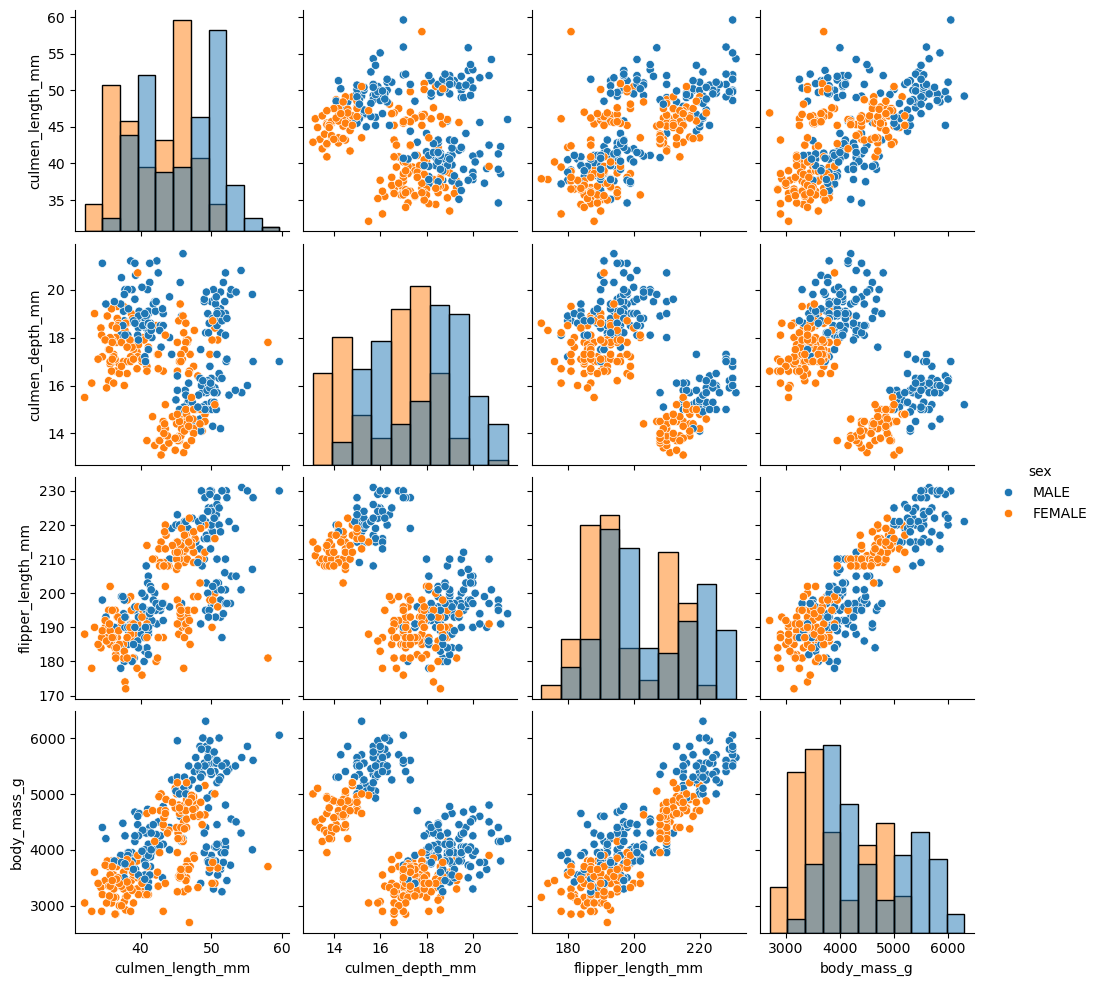

In [16]:
sns.pairplot(data=df, hue='sex', diag_kind='hist', palette='tab10')

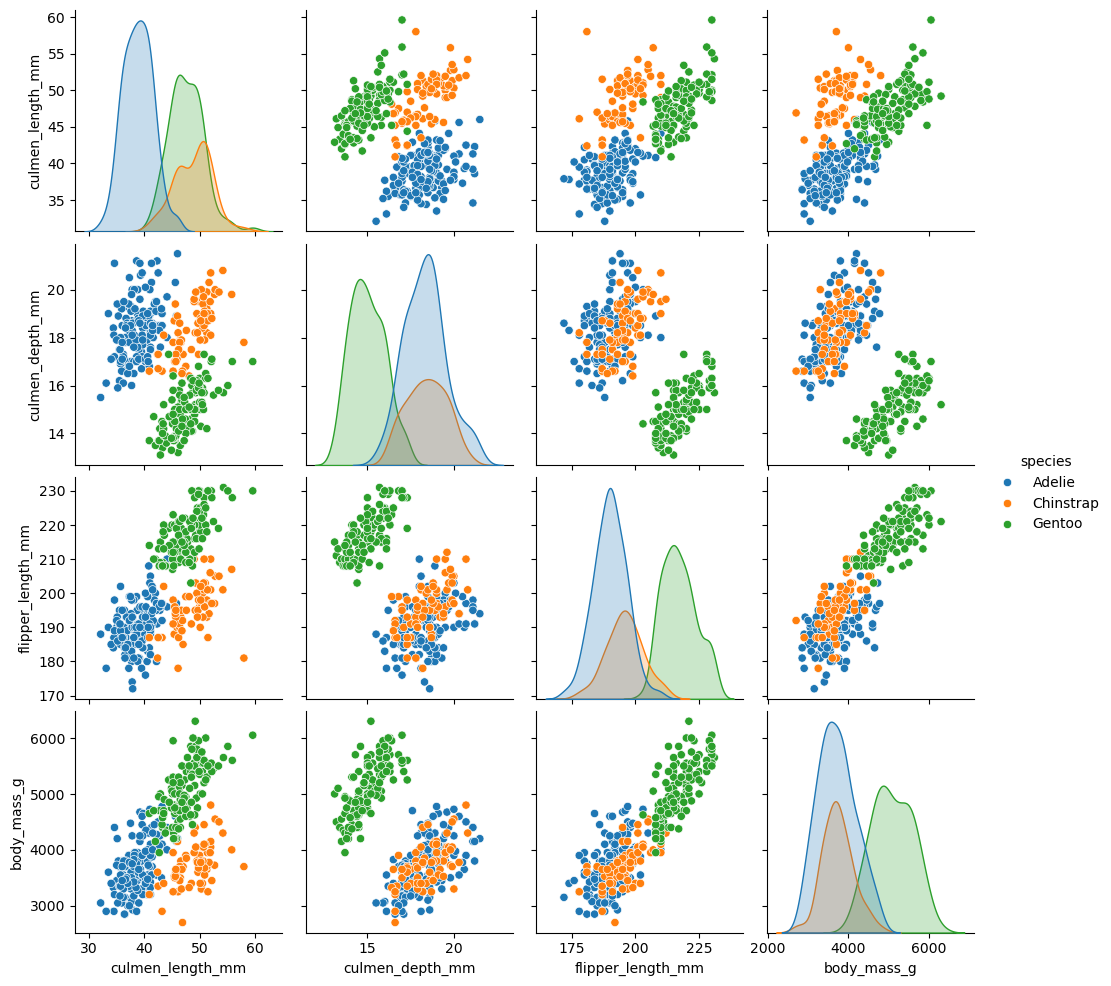

In [17]:
## Here another one. This time by species

sns.pairplot(data=df, hue='species', palette='tab10')

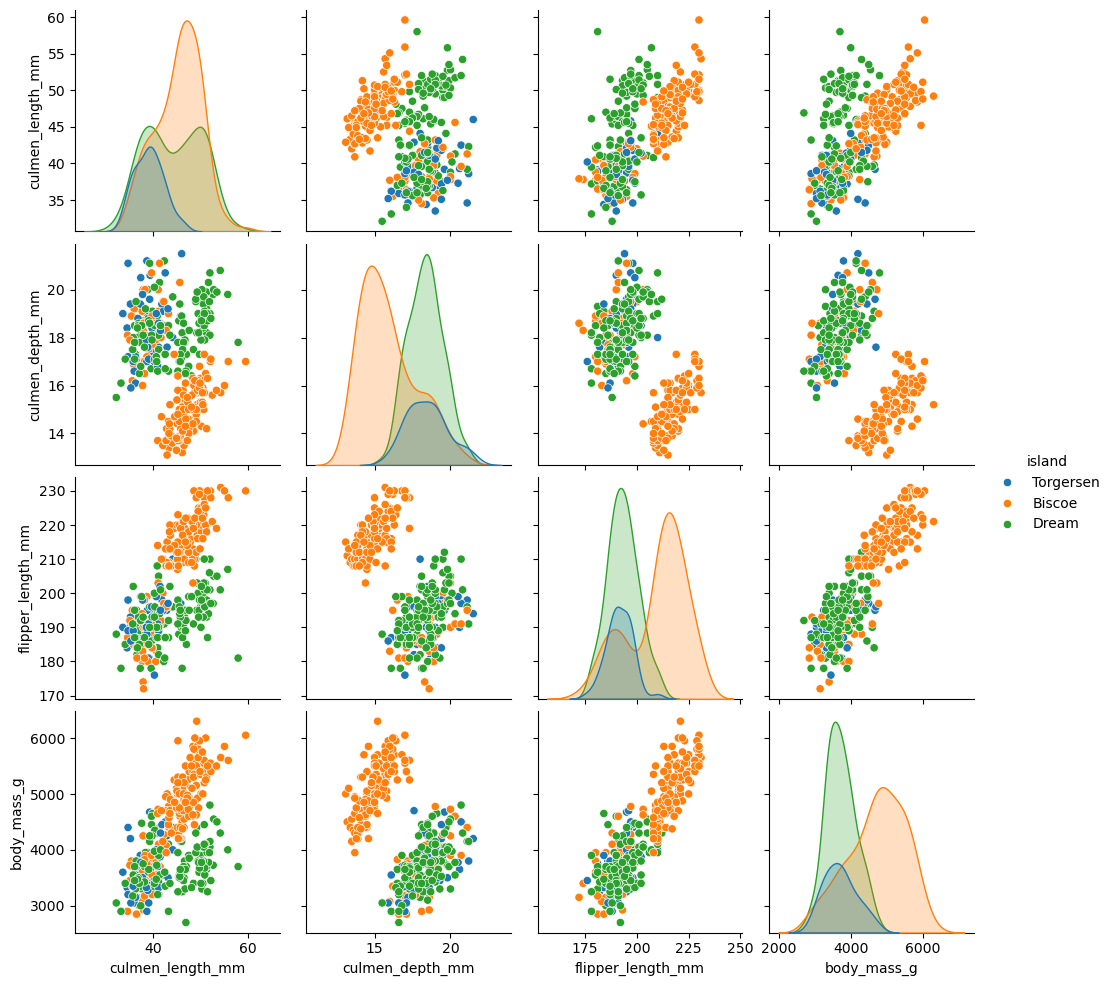

In [18]:
sns.pairplot(data=df, hue='island', palette='tab10')

Let's say we want to include penguins gender in the scatter plots above. This means we want to convert this column into numerical data. This is not hard to do. We can associate 0 with male and 1 with female or vise versa. We can pass this to our data frame as dictionary using map:

In [19]:
df['sex']=df.sex.map({'MALE':0,'FEMALE':1})
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,0
1,Adelie,Torgersen,39.5,17.4,186,3800,1
2,Adelie,Torgersen,40.3,18.0,195,3250,1
3,Adelie,Torgersen,36.7,19.3,193,3450,1
4,Adelie,Torgersen,39.3,20.6,190,3650,0
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,1
329,Gentoo,Biscoe,46.8,14.3,215,4850,1
330,Gentoo,Biscoe,50.4,15.7,222,5750,0
331,Gentoo,Biscoe,45.2,14.8,212,5200,1


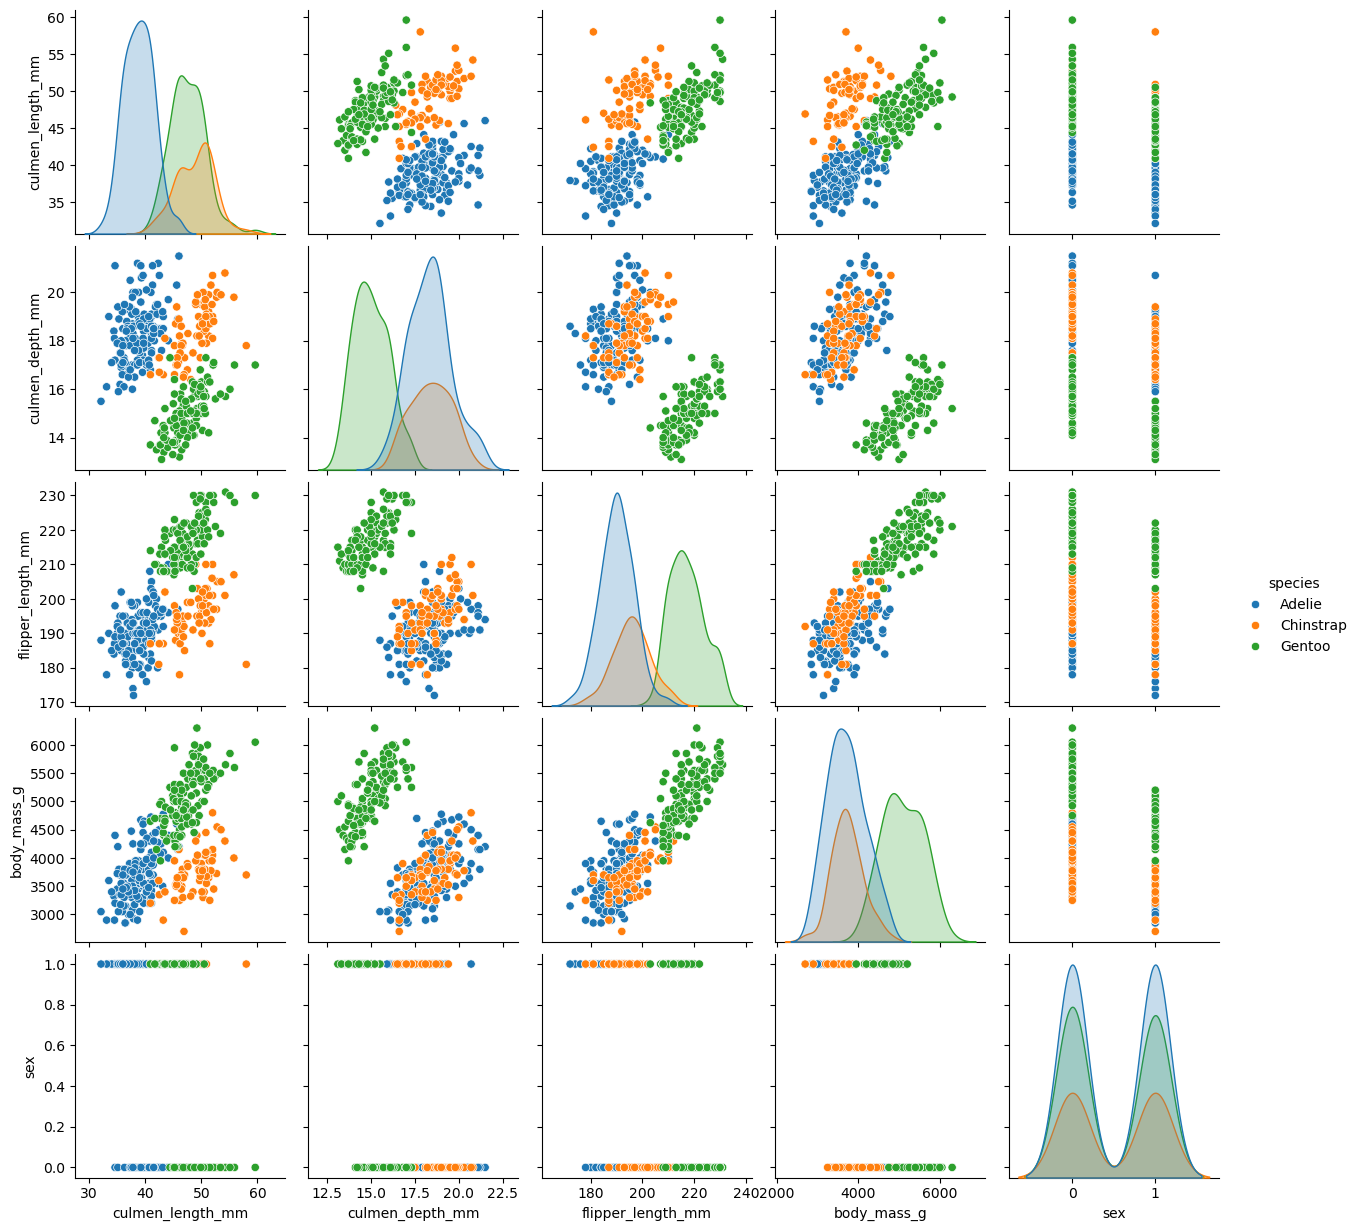

In [20]:
sns.pairplot(data=df, hue='species',  palette='tab10')

There are many other things you can do with seaborn. You are welcome to explore more. Below you can see a couple of more examples:

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

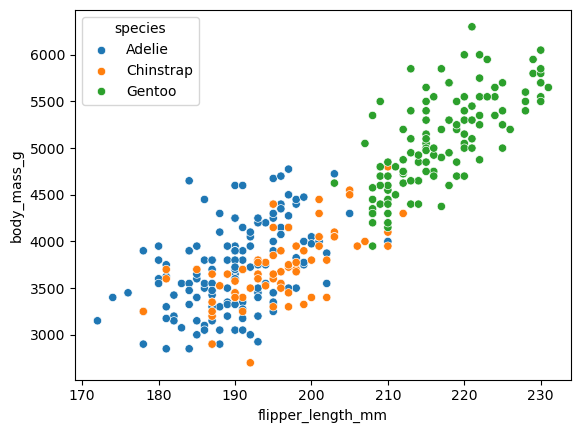

In [21]:
## Regular scatter plot directly from data frame

sns.scatterplot(x="flipper_length_mm",
                y="body_mass_g",
                data=df,
                hue='species')

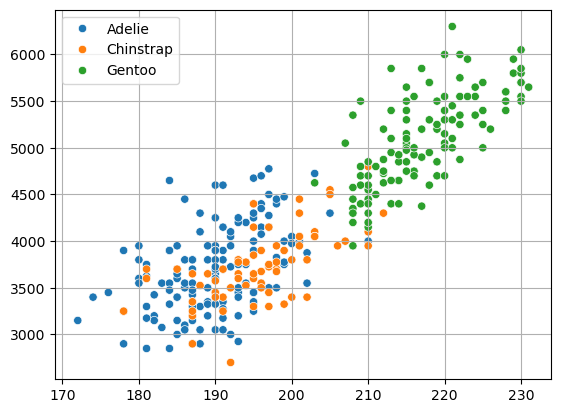

In [22]:
## or if you have an array

X=np.array(df.loc[:,"flipper_length_mm"])
Y=np.array(df.loc[:,"body_mass_g"])
color=np.array(df.loc[:,'species'])

fig=plt.figure()
sns.scatterplot(x=X,y=Y, hue=color)
plt.grid()
plt.legend()
fig.show()

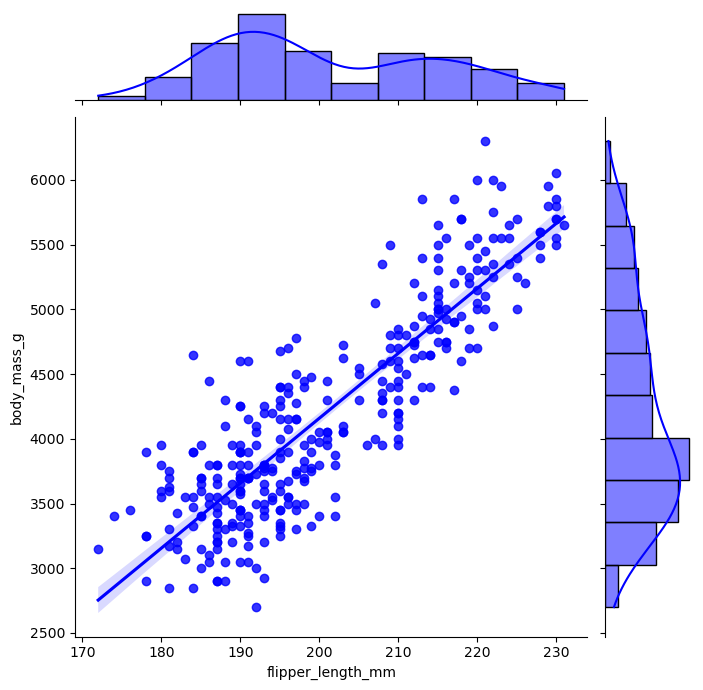

In [23]:
## Specific scatter plot with regresion line.
sns.jointplot(x="flipper_length_mm",
              y="body_mass_g",
              data=df,
              kind="reg",
              color="blue",
              height=7);

<Axes: >

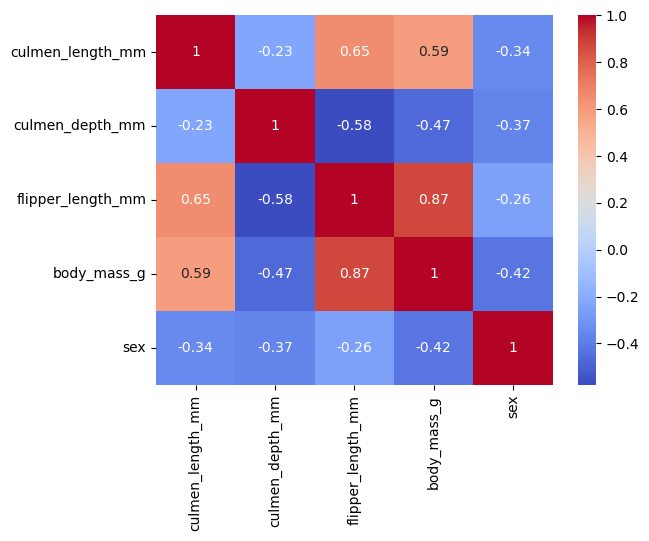

In [24]:
# Correlations heat map
df2=df.iloc[:,2:]
sns.heatmap(df2.corr(method="pearson"), cmap="coolwarm", annot=True)

### Type Conversion

As you saw we did everything here using data frames. However, sometimes we want to view these tables as large matricies and we want to be able to do calculation on those matricies. Data Frames do now allow that. So, we have to be able to transform from data frame to an array and back. 

Let's take a numerical part of our data frame and convert it to NumPy array.

In [25]:
df2.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181,3750,0
1,39.5,17.4,186,3800,1
2,40.3,18.0,195,3250,1
3,36.7,19.3,193,3450,1
4,39.3,20.6,190,3650,0


In [26]:
M=np.array(df2)
M

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 0.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 0.00e+00]])

As you can see, it is a array now. You can also transform it to SymPy Matrix if needed:

In [27]:
SM=sp.Matrix(df2)

And finally we can go back to Data Frame. (note the capitalization)

In [28]:
pd.DataFrame(M)

,0,1,2,3,4
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
3,36.7,19.3,193.0,3450.0,1.0
4,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,1.0
329,46.8,14.3,215.0,4850.0,1.0
330,50.4,15.7,222.0,5750.0,0.0
331,45.2,14.8,212.0,5200.0,1.0


Unfortunatelly, we cant go directly from SymPy matrix to dataframe. However, usually it is not needed anyway as NumPy is faster library and most calculation is done there.

Finally, sometimes we might be interested in adding a new column to our Data Frame. It is quite easy. Let's add back add island name to our df2 data frame. 

In [37]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,0
1,Adelie,Torgersen,39.5,17.4,186,3800,1
2,Adelie,Torgersen,40.3,18.0,195,3250,1
3,Adelie,Torgersen,36.7,19.3,193,3450,1
4,Adelie,Torgersen,39.3,20.6,190,3650,0
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,1
329,Gentoo,Biscoe,46.8,14.3,215,4850,1
330,Gentoo,Biscoe,50.4,15.7,222,5750,0
331,Gentoo,Biscoe,45.2,14.8,212,5200,1


In [39]:
S=df.island
S

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
328       Biscoe
329       Biscoe
330       Biscoe
331       Biscoe
332       Biscoe
Name: island, Length: 333, dtype: object

In [40]:
df2["Home Island"]=S
df2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Home Island
0,39.1,18.7,181,3750,0,Torgersen
1,39.5,17.4,186,3800,1,Torgersen
2,40.3,18.0,195,3250,1,Torgersen
3,36.7,19.3,193,3450,1,Torgersen
4,39.3,20.6,190,3650,0,Torgersen
...,...,...,...,...,...,...
328,47.2,13.7,214,4925,1,Biscoe
329,46.8,14.3,215,4850,1,Biscoe
330,50.4,15.7,222,5750,0,Biscoe
331,45.2,14.8,212,5200,1,Biscoe
